In [1]:
'''
Title - the title of the GitHub bug, feature, question
Body - the body of the GitHub bug, feature, question
Label - Represents various classes of Labels
        Bug - 0
        Feature - 1
        Question - 2
'''
import numpy as np
import pandas as pd
import json

In [2]:
df_train = pd.read_json("embold_train.json")
df_train_extra = pd.read_json("embold_train_extra.json")
df_train.head()

title  \
0                                  y-zoom piano roll   
1                        buggy behavior in selection   
2                                auto update feature   
3                 filter out noisy endpoints in logs   
4  enable pid on / pid off alarm actions for ardu...   

                                                body  label  
0        a y-zoom on the piano roll would be useful.      1  
1  ! screenshot from 2016-02-23 21 27 40  https:/...      0  
2  hi,\r \r great job so far, @saenzramiro ! : \r...      1  
3  i think we should stop logging requests to:\r ...      1  
4  expected behavior\r alarm actions pid on and p...      0

In [3]:
df_test = pd.read_json("embold_test.json")
df_test.head()

title  \
0  config question  path-specific environment var...   
1                                   crash indien vol   
2                               unable to mine rocks   
3                   not all whitelists are processed   
4          add ctx menu for idafree 70 and idafree 5   

                                                body  
0  issue description or question\r \r hey @artemg...  
1                de simulator crasht als hij vol zit  
2  sarkasmo starting today, when i hit enter  act...  
3  create following rules... order of creation is...  
4  associated with .dll, .dll_, .exe, .exe_, .sc,...

In [4]:
df_train.loc[9,:]

title    en la org ull-esit-pl-1617 people info /nico/ ...
body     \r crguezl>ull-esit-pl-1617> people info /nico...
label                                                    0
Name: 9, dtype: object

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='label', ylabel='count'>

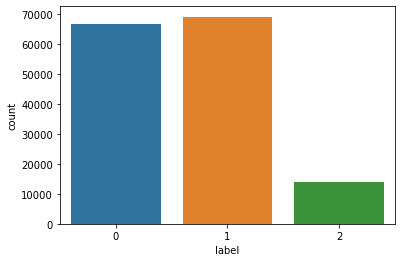

In [6]:
sns.countplot(df_train.label)

<AxesSubplot:xlabel='label', ylabel='count'>

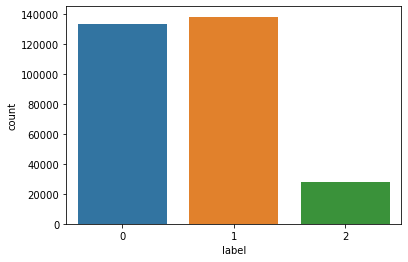

In [7]:
sns.countplot(df_train_extra.label)

In [8]:
import nltk
import string
import re
from nltk.stem.snowball import SnowballStemmer
stopwords=nltk.corpus.stopwords.words('english')
stopwords = list(set(stopwords)-set(['how', 'what', 'which', 'why', 'where', 'when', 'whom'])) #Keep the Interrogative  words for class=2 Question

In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    tag=nltk.pos_tag([word])[0][1][0].upper()
    tag_dict={'J':wordnet.ADJ,
              'N':wordnet.NOUN,
              'V':wordnet.VERB,
              'R':wordnet.ADV
             }
    return tag_dict.get(tag,wordnet.NOUN)

In [10]:
lemmatizer=WordNetLemmatizer()
def treat_text(text):
    edited_text = re.sub("\?"," questionmark", text) #To convert '?' to 'questionmark' to preserve Interrogative context
    edited_text = re.sub("https://\S+|http://\S+","",edited_text) #remove https/http links
    edited_text = re.sub(r"\\r","",edited_text) #remove //r in string
    edited_text = re.sub('\w*\.\w*',"",edited_text) #remove strings like aw.pidcontrol.svmode, main.py
    edited_text =re.sub('\W'," ",edited_text) #replace any symbol with whitespace
    edited_text = re.sub("\_|\__"," ",edited_text) #replace any underscore with whitespace
    edited_text=re.sub("  "," ",edited_text) #replace double whitespace with single whitespace
    edited_text=edited_text.split(" ")
    edited_text=" ".join([char for char in edited_text if char!= ""]) #remove any empty string from text
    edited_text=edited_text.lower() #lowercase
    edited_text=re.sub('\d+',"",edited_text) #Removing numerics
    edited_text=edited_text.split()
    edited_text=" ".join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) 
                          for word in edited_text if word not in stopwords]) #apply lemmatization with POS tagging
    return edited_text

In [11]:
df_train['combined_text']=df_train['title'] + " " + df_train['body']
df_train.head()

title  \
0                                  y-zoom piano roll   
1                        buggy behavior in selection   
2                                auto update feature   
3                 filter out noisy endpoints in logs   
4  enable pid on / pid off alarm actions for ardu...   

                                                body  label  \
0        a y-zoom on the piano roll would be useful.      1   
1  ! screenshot from 2016-02-23 21 27 40  https:/...      0   
2  hi,\r \r great job so far, @saenzramiro ! : \r...      1   
3  i think we should stop logging requests to:\r ...      1   
4  expected behavior\r alarm actions pid on and p...      0   

                                       combined_text  
0  y-zoom piano roll a y-zoom on the piano roll w...  
1  buggy behavior in selection ! screenshot from ...  
2  auto update feature hi,\r \r great job so far,...  
3  filter out noisy endpoints in logs i think we ...  
4  enable pid on / pid off alarm actions for ardu...

In [12]:
df_test['combined_text']=df_test['title'] + " " + df_test['body']
df_test.head()

title  \
0  config question  path-specific environment var...   
1                                   crash indien vol   
2                               unable to mine rocks   
3                   not all whitelists are processed   
4          add ctx menu for idafree 70 and idafree 5   

                                                body  \
0  issue description or question\r \r hey @artemg...   
1                de simulator crasht als hij vol zit   
2  sarkasmo starting today, when i hit enter  act...   
3  create following rules... order of creation is...   
4  associated with .dll, .dll_, .exe, .exe_, .sc,...   

                                       combined_text  
0  config question  path-specific environment var...  
1  crash indien vol de simulator crasht als hij v...  
2  unable to mine rocks sarkasmo starting today, ...  
3  not all whitelists are processed create follow...  
4  add ctx menu for idafree 70 and idafree 5 asso...

In [13]:
print(df_train.shape)
print(df_test.shape)

(150000, 4)
(30000, 3)


In [14]:
'''
Instead of apply function tqdm library offers progress_apply to provide progress bar for the apply function on pandas dataframe
'''
from tqdm import tqdm
tqdm.pandas(desc='Text Processing')

In [15]:
df_train['Treated_Text']=df_train['combined_text'].progress_apply(lambda x: treat_text(x)) # Applying Text Processing on combined_text column
df_train.head()

Text Processing: 100%|██████████| 150000/150000 [1:00:10<00:00, 41.55it/s]


title  \
0                                  y-zoom piano roll   
1                        buggy behavior in selection   
2                                auto update feature   
3                 filter out noisy endpoints in logs   
4  enable pid on / pid off alarm actions for ardu...   

                                                body  label  \
0        a y-zoom on the piano roll would be useful.      1   
1  ! screenshot from 2016-02-23 21 27 40  https:/...      0   
2  hi,\r \r great job so far, @saenzramiro ! : \r...      1   
3  i think we should stop logging requests to:\r ...      1   
4  expected behavior\r alarm actions pid on and p...      0   

                                       combined_text  \
0  y-zoom piano roll a y-zoom on the piano roll w...   
1  buggy behavior in selection ! screenshot from ...   
2  auto update feature hi,\r \r great job so far,...   
3  filter out noisy endpoints in logs i think we ...   
4  enable pid on / pid off alarm actions for ardu...   

                                        Treated_Text  
0              zoom piano roll zoom piano roll would  
1                buggy behavior selection screenshot  
2  auto update feature hi great job far saenzrami...  
3  filter noisy endpoint log think stop log reque...  
4  enable pid pid alarm action arduino tc expect ...

In [16]:
df_test['Treated_Text']=df_test['combined_text'].progress_apply(lambda x: treat_text(x)) # Applying Text Processing on combined_text column
df_test.head()

Text Processing: 100%|██████████| 30000/30000 [10:00<00:00, 49.96it/s]


title  \
0  config question  path-specific environment var...   
1                                   crash indien vol   
2                               unable to mine rocks   
3                   not all whitelists are processed   
4          add ctx menu for idafree 70 and idafree 5   

                                                body  \
0  issue description or question\r \r hey @artemg...   
1                de simulator crasht als hij vol zit   
2  sarkasmo starting today, when i hit enter  act...   
3  create following rules... order of creation is...   
4  associated with .dll, .dll_, .exe, .exe_, .sc,...   

                                       combined_text  \
0  config question  path-specific environment var...   
1  crash indien vol de simulator crasht als hij v...   
2  unable to mine rocks sarkasmo starting today, ...   
3  not all whitelists are processed create follow...   
4  add ctx menu for idafree 70 and idafree 5 asso...   

                                        Treated_Text  
0  config question path specific environment vari...  
1  crash indien vol de simulator crasht al hij vo...  
2  unable mine rock sarkasmo start today when hit...  
3  whitelists process create follow order creatio...  
4             add ctx menu idafree idafree associate

In [17]:
# word_count = pd.Series(' '.join(df_train.Treated_Text).split()).value_counts()

In [18]:
df_train.Treated_Text.progress_apply(lambda x: len(x.split(" "))).mean()

Text Processing: 100%|██████████| 150000/150000 [00:00<00:00, 330404.98it/s]


46.2755

In [86]:
df_train.Treated_Text.progress_apply(lambda x: len(x.split(" "))).max()

Text Processing: 100%|██████████| 150000/150000 [00:00<00:00, 315980.65it/s]


3685

In [19]:
df_train[['Treated_Text','label']].to_csv("Cleaned_train.csv")
df_test['Treated_Text'].to_csv("Cleaned_test.csv")

In [20]:
df_train=pd.read_csv('Cleaned_train.csv', index_col=0)
df_train.isna().sum()

Treated_Text    0
label           0
dtype: int64

In [21]:
df_test=pd.read_csv('Cleaned_test.csv', index_col=0)
df_test.isna().sum()

Treated_Text    0
dtype: int64

In [49]:
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(25,15))
    plt.imshow(wordcloud)
    plt.axis('off')

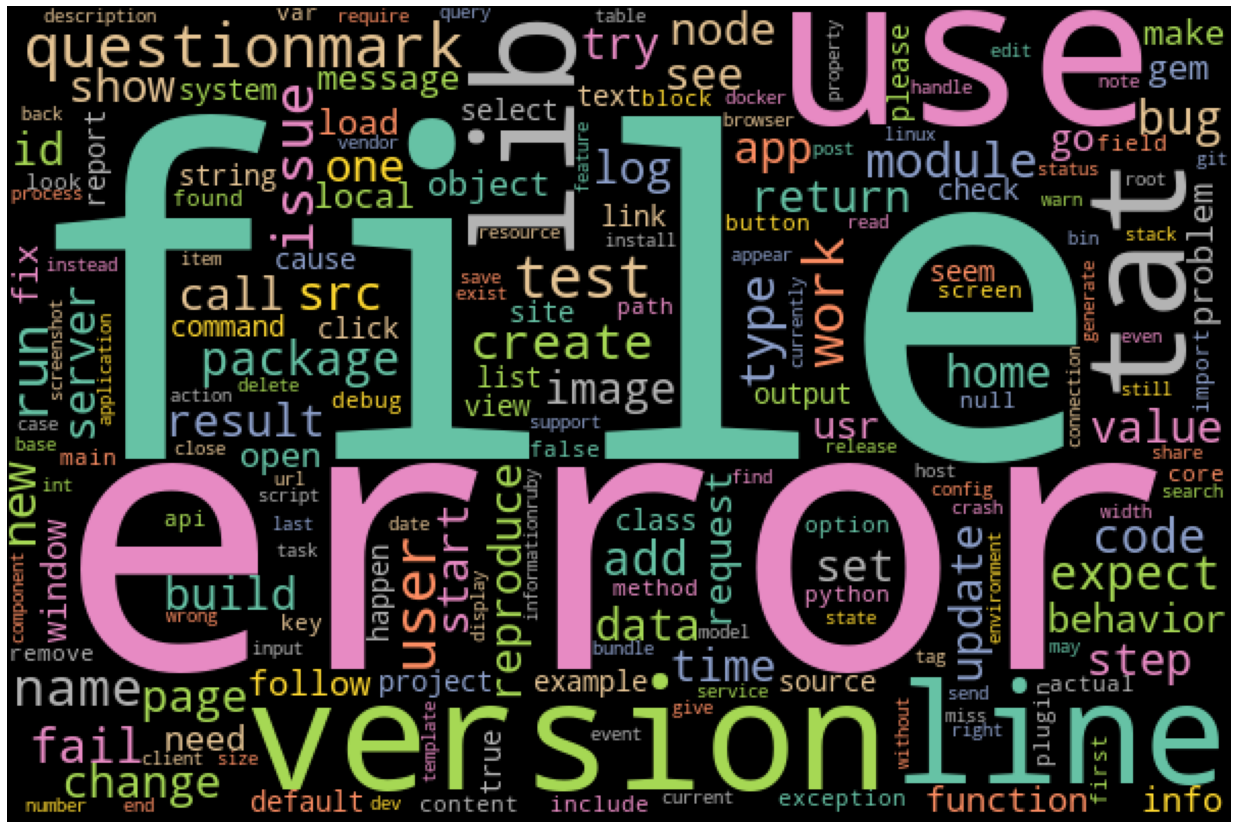

In [57]:
from wordcloud import WordCloud
word_data = df_train[df_train.label == 0].Treated_Text.str.cat(sep=" ")
word_cloud = WordCloud(width=600, height=400, random_state=1, 
                        background_color='black', colormap='Set2',
                        collocations= False, max_words=200, stopwords=None
                        ).generate(word_data)
plot_cloud(word_cloud)

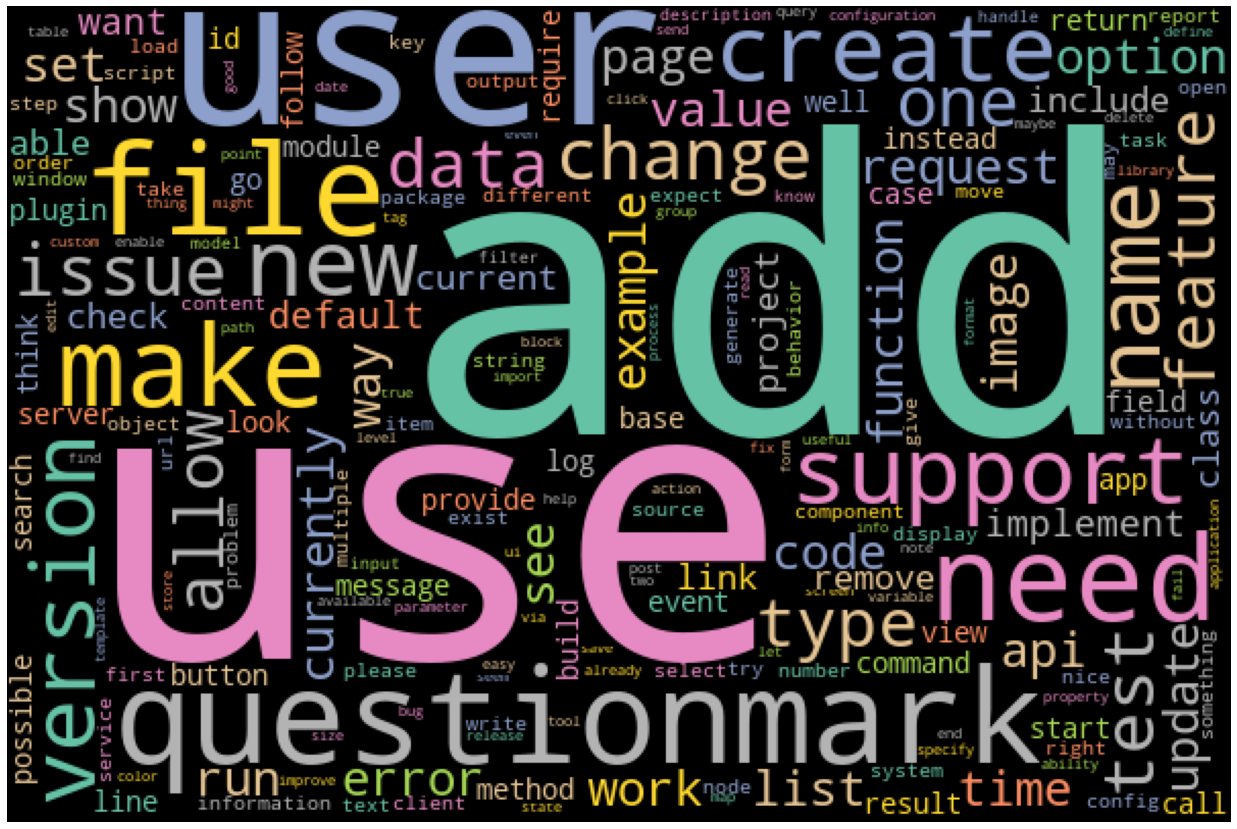

In [58]:
word_data = df_train[df_train.label == 1].Treated_Text.str.cat(sep=" ")
word_cloud = WordCloud(width=600, height=400, random_state=1, 
                        background_color='black', colormap='Set2',
                        collocations= False, max_words=200,stopwords=None
                        ).generate(word_data)
plot_cloud(word_cloud)

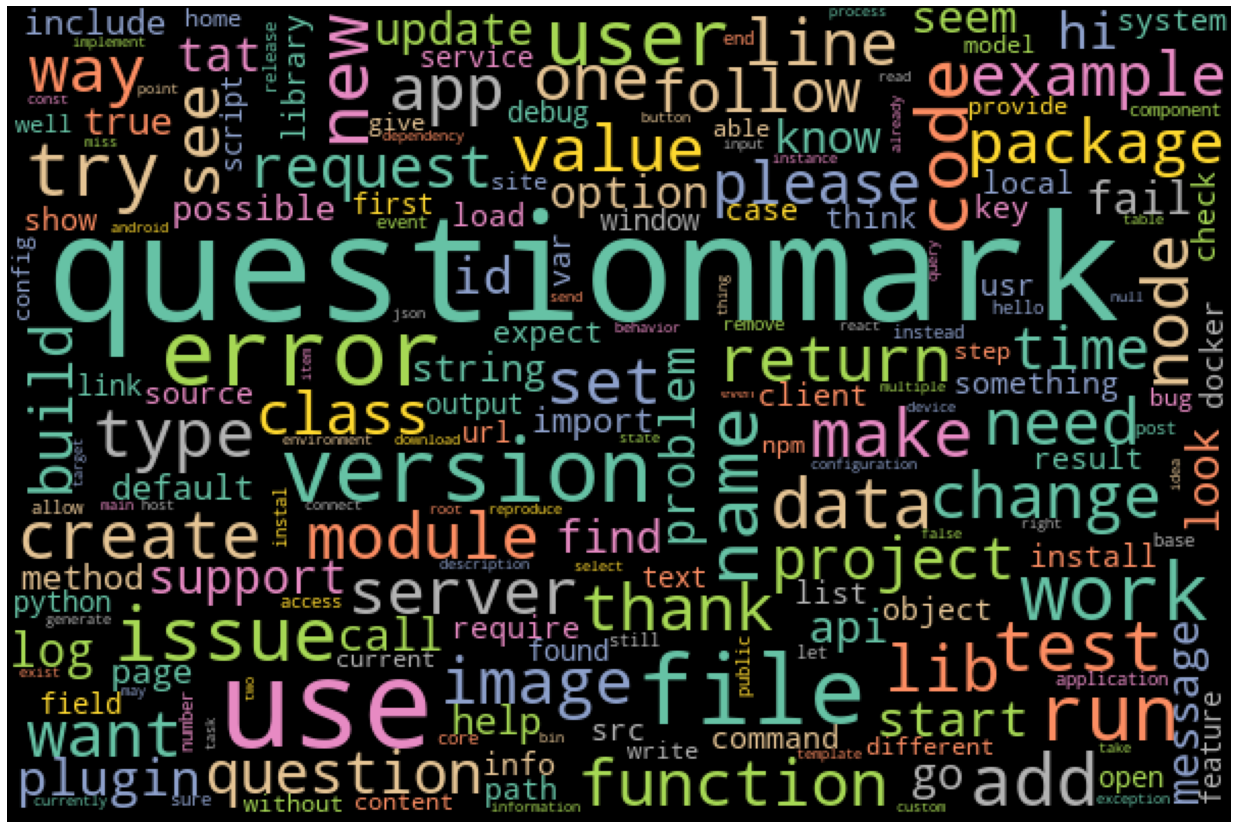

In [59]:
word_data = df_train[df_train.label == 2].Treated_Text.str.cat(sep=" ")
word_cloud = WordCloud(width=600, height=400, random_state=1, 
                        background_color='black', colormap='Set2',
                        collocations= False, max_words=200,stopwords=None
                        ).generate(word_data)
plot_cloud(word_cloud)